## Introduction to Data Science

### Predictive Analysis - numerical data with regularization

#### Inspired by [this repo](https://github.com/Weesper1985/Predict_real_estate_prices), codes [here](https://www.kaggle.com/dhainjeamita/linear-regression/code), [here](https://www.kaggle.com/vikrishnan/house-sales-price-using-regression) and [here](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/). Used [this data](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). Tried using [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) techniques

In [0]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

from itertools import cycle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LogNorm
import seaborn as sns
#import pydotplus

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz

import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from IPython.display import Image  

%matplotlib inline

In [0]:
#Checking if we have a GPU
device_lib.list_local_devices()

### Importing the datasets and exploring data

In [0]:
datapath = "./data/communities/"
outputs = "./data/communities/"

In [0]:
!ls ./data/communities/

In [0]:
! head -n10 ./data/communities/communities.names

In [0]:
! head -n3 ./data/communities/communities.data

In [0]:
names = open(os.path.join(datapath, 'communities.names'), 'r').readlines()
attributes = [n for n in names if n.startswith('@attribute')]
attributes = [a.split()[1] for a in attributes]
print(len(attributes))
print(attributes)

In [0]:
df = pd.read_csv(os.path.join(datapath, 'communities.data'), 
                 na_values='?', 
                 header=None, 
                 names=attributes)
df.head()

In [0]:
df.info(verbose=True, null_counts=True)

In [0]:
#non numeric
columns1 = ['state', 'county', 'community', 'communityname', 'fold']

#many missing values
columns2 = ['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
            'LemasTotalReq',  'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
            'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
            'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
            'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
            'LemasGangUnitDeploy', 'PolicBudgPerPop', 'OtherPerCap']

df.drop(columns=columns1, inplace=True)
df.drop(columns=columns2, inplace=True)

In [0]:
df.info(verbose=True, null_counts=True)

In [0]:
# histograms
df.hist(bins=10,figsize=(18,14),grid=False);

In [0]:
df.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(16,12))
plt.show()

In [0]:
# correlation
pd.set_option('precision', 2)
df.corr(method='pearson')

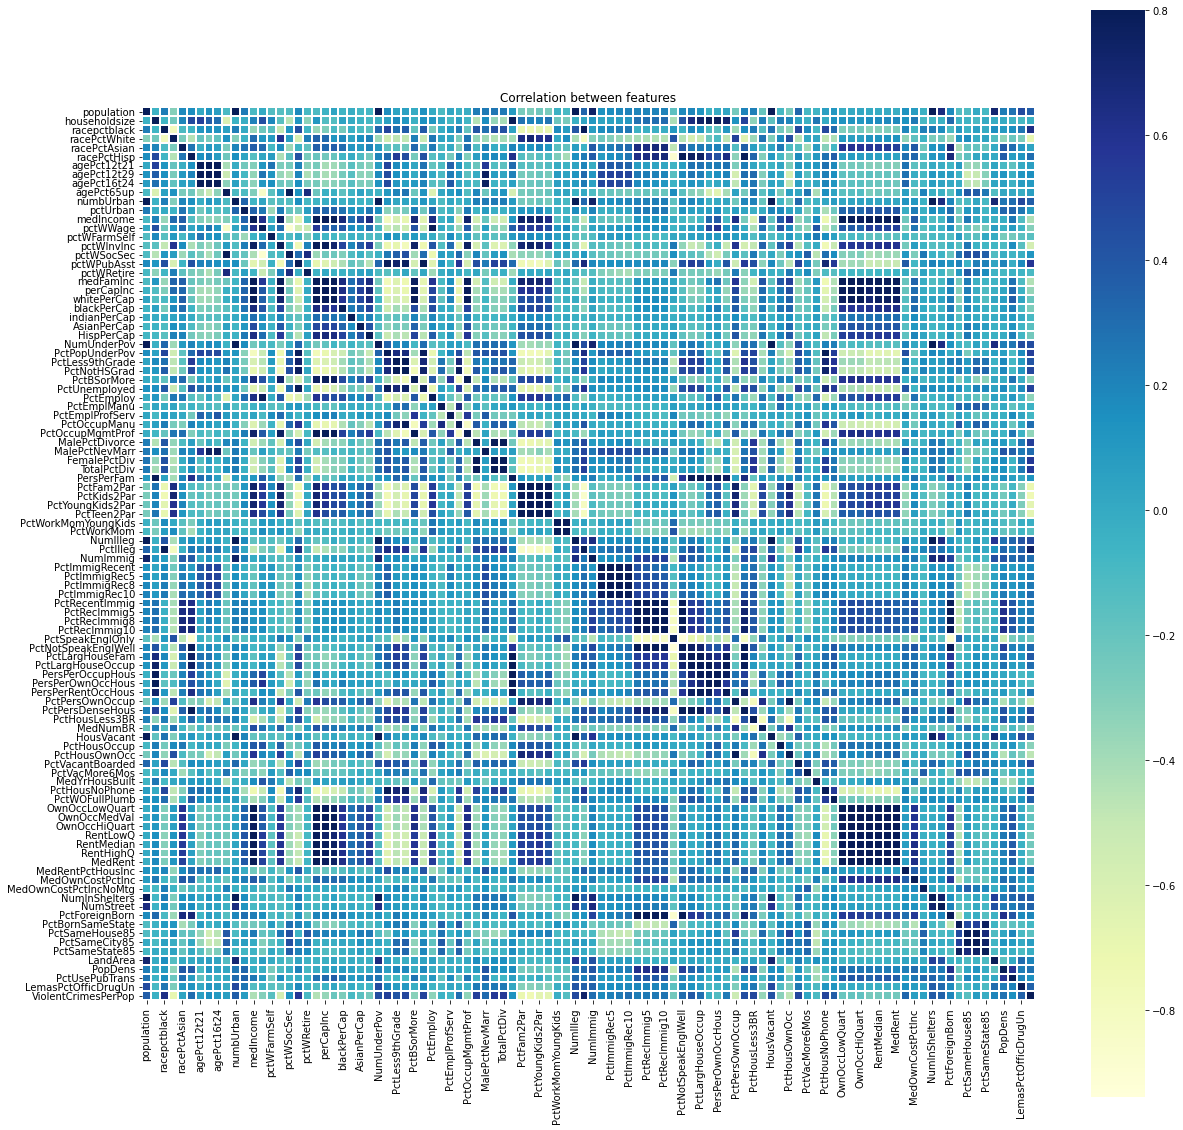

In [0]:
corr=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [0]:
crimes = df['ViolentCrimesPerPop']

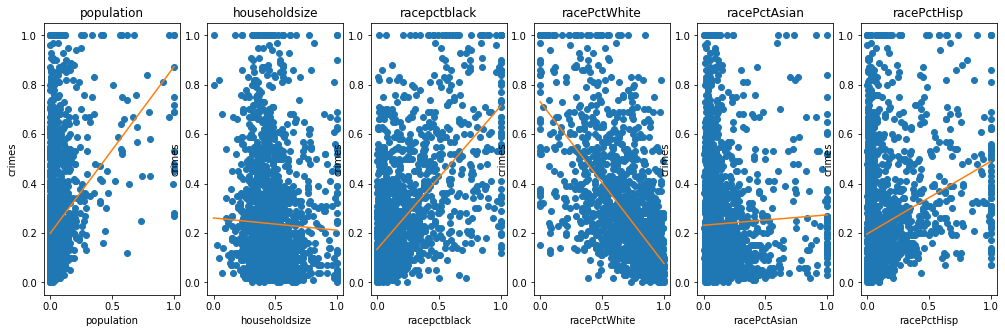

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[0:6]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

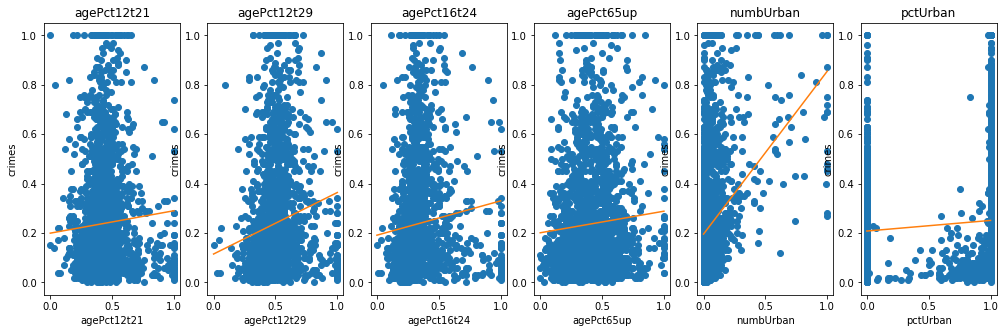

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[6:12]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

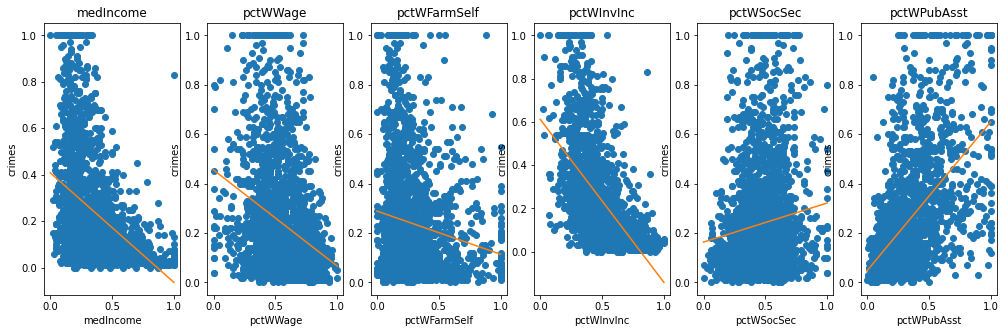

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[12:18]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

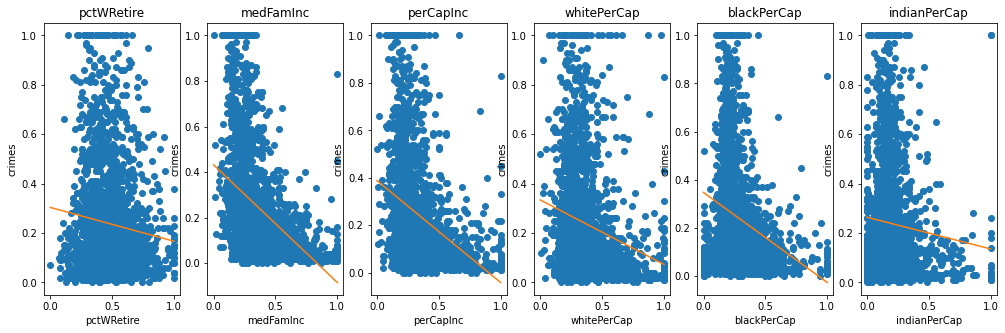

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[18:24]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

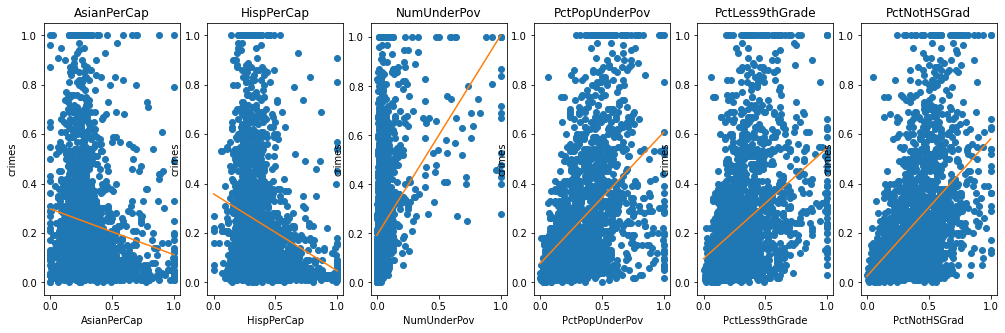

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[24:30]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

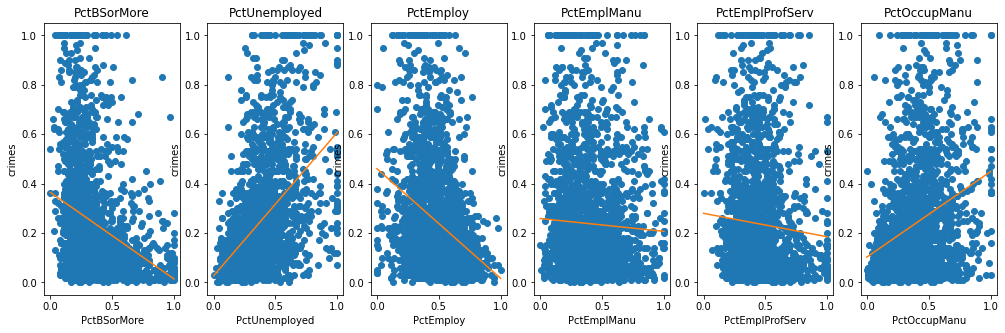

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[30:36]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

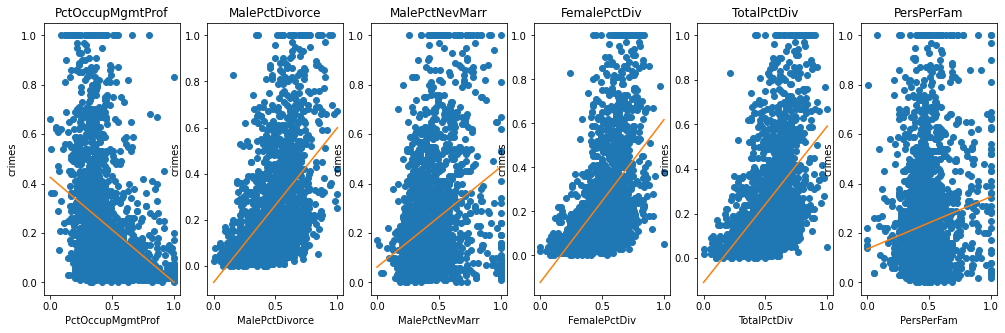

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[36:42]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

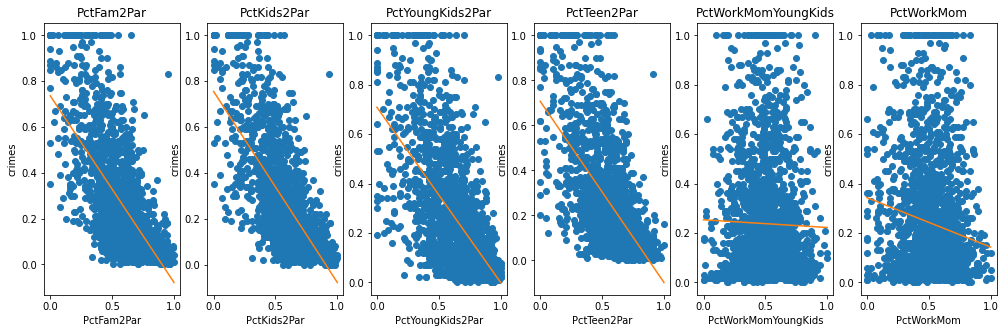

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[42:48]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

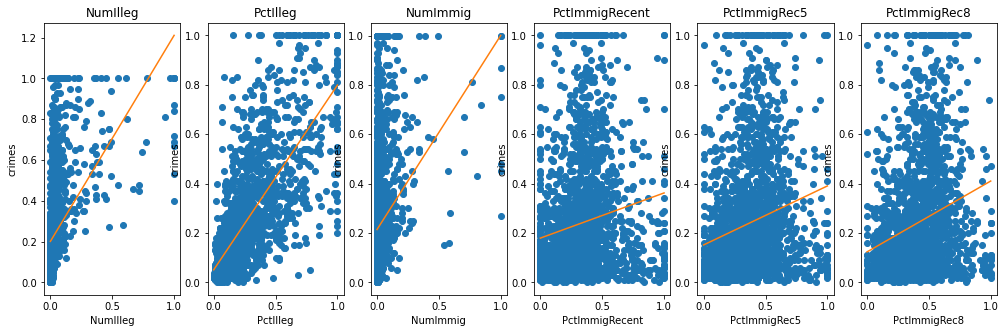

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[48:54]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

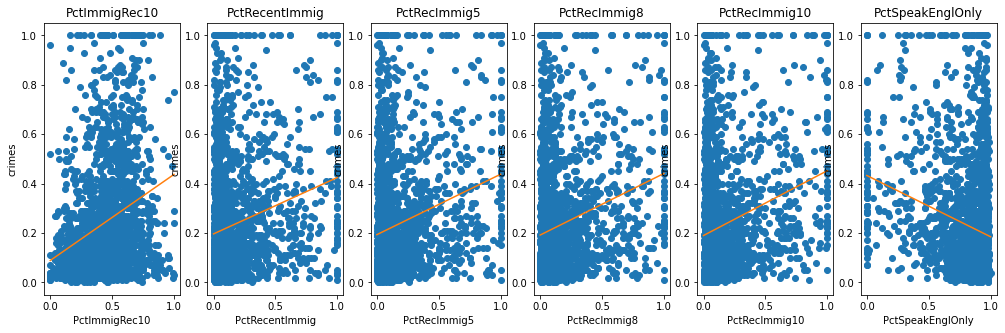

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[54:60]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

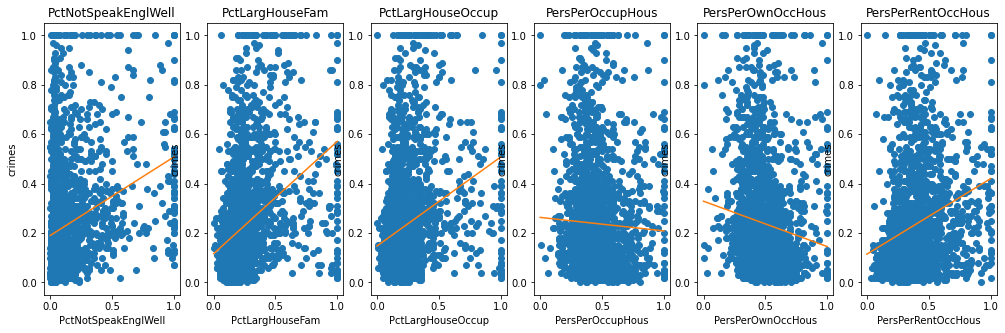

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[60:66]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

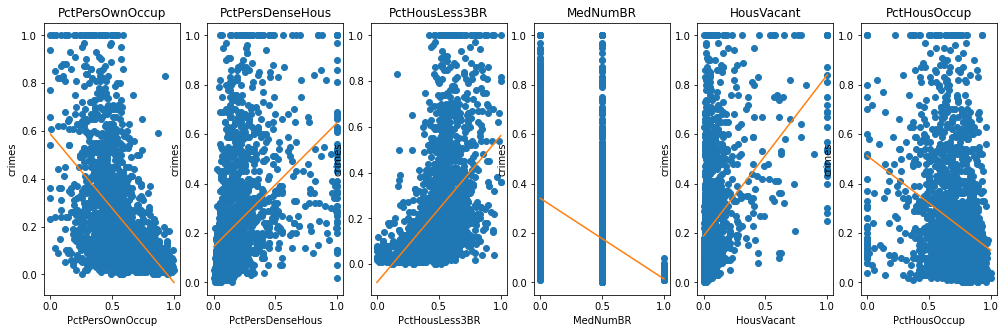

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[66:72]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

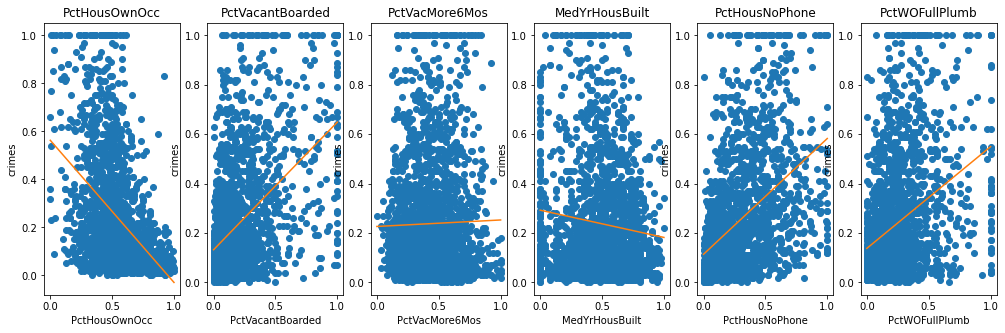

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[72:78]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

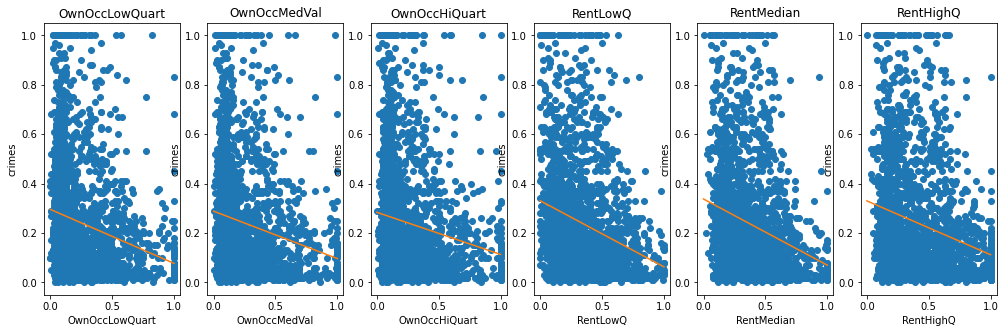

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[78:84]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

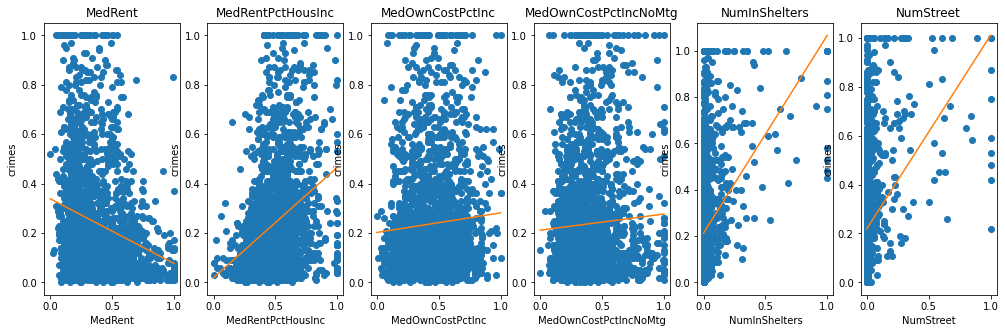

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[84:90]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

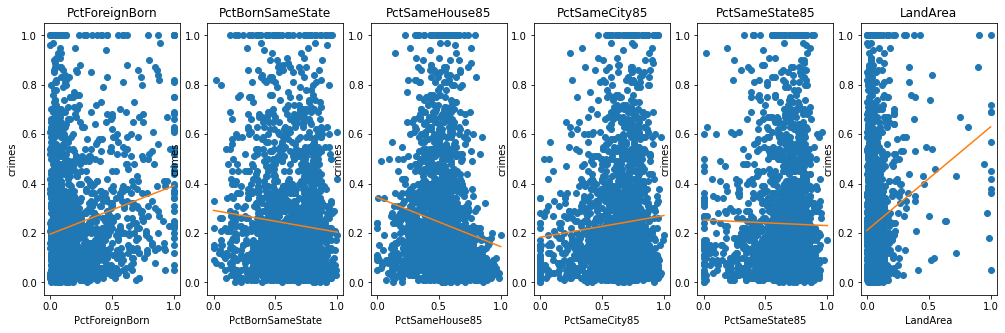

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[90:96]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

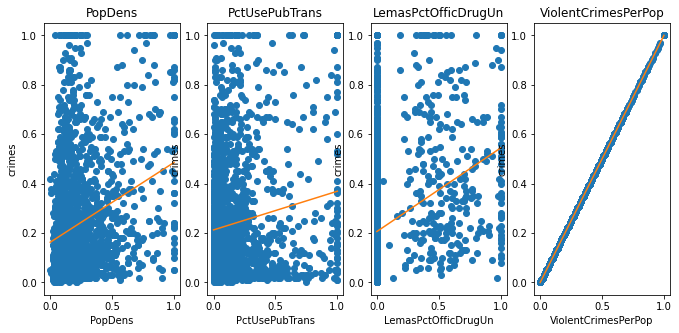

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[96:]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

The point here is to test 'crimes' in a very lean way. 
We'll do this paying attention to: Histogram - Kurtosis and skewness. 
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


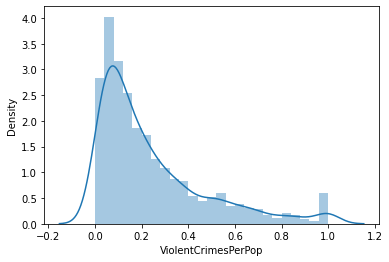

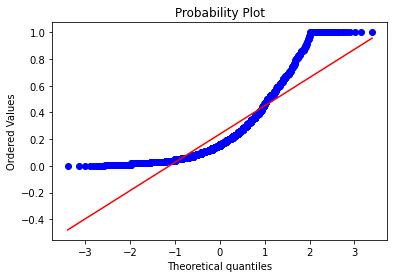

In [0]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(crimes, hist=True);
fig = plt.figure()
res = stats.probplot(crimes, plot=plt)

### Preparing Data for predictions

In [0]:
# split into input (X) and output (Y) variables
X = df.values[:,0:-1]
y = df.values[:,99]

print(X.shape)
print(y.shape)

(1994, 99)
(1994,)


#### Split-out validation dataset

In [0]:
validation_size = 0.20
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric using Root Mean Square error method
#http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

num_folds = 10
#score = 'neg_mean_squared_error'
score = 'r2'

#### Spot Check Algorithms

In [0]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVR', SVR()))
models.append(('RIDGE', Ridge(random_state=seed)))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor(random_state=seed)))
models.append(('GPR', GaussianProcessRegressor(random_state=seed)))

In [0]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.642712 (0.042964)
LASSO: -0.019035 (0.020376)
EN: -0.019035 (0.020376)
KNN: 0.586496 (0.074766)
CART: 0.201906 (0.131115)
SVR: 0.635397 (0.046639)
RIDGE: 0.650887 (0.042516)
RIDGECV: 0.650887 (0.042516)
MLPR: 0.630547 (0.054628)
GPR: 0.516207 (0.053312)


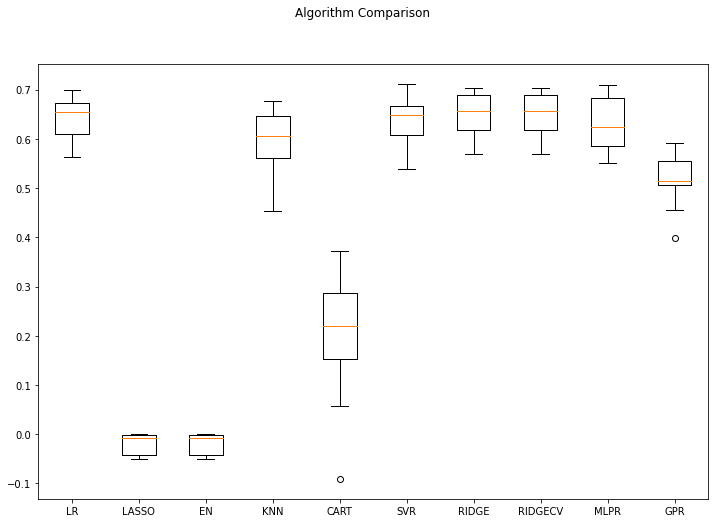

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Standardizing the dataset

In [0]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(random_state=seed))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=seed))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(random_state=seed))])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(random_state=seed))])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledMLPR', Pipeline([('Scaler', StandardScaler()),('MLPR', MLPRegressor(random_state=seed))])))
pipelines.append(('ScaledGPR', Pipeline([('Scaler', StandardScaler()),('GPR', GaussianProcessRegressor(random_state=seed))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-2003229551922527> in <cell line: 14>()
     13 names = []
     14 for name, model in pipelines:
---> 15     kfold = KFold(n_splits=num_folds, random_state=seed)
     16     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
     17     results.append(cv_results)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py in inner_f(*args, **kwargs)
     61             extra_args = len(args) - len(all_args)
     62             if extra_args <= 0:
---> 63                 return f(*args, **kwargs)
     64 
     65             # extra_args > 0

/databricks/python/lib/python3.9/site-packages/sklearn/model_selection/_split.py in __init__(self, n_splits, shuffle, random_state)
    426     def __init__(self, n_splits=5, *, shuffle=False,
    427                  random_state=None):
--> 428   

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=70)
plt.show()

### KNN Algorithm tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Regression Tree Algorithm tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split_values = [2,3,4]
min_samples_leaf_values = [1,20,40,60,80]

param_grid = dict(min_samples_split=min_samples_split_values, min_samples_leaf=min_samples_leaf_values)
model = DecisionTreeRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### [Interpreting the Tree](http://blog.datadive.net/interpreting-random-forests/)

A Decision Tree is a tree (and a type of directed, acyclic graph) in which the nodes represent decisions (a square box), random transitions (a circular box) or terminal nodes, and the edges or branches are binary (yes/no, true/false) representing possible paths from one node to another. The specific type of decision tree used for machine learning contains no random transitions. To use a decision tree for classification or regression, one grabs a row of data or a set of features and starts at the root, and then through each subsequent decision node to the terminal node. The process is very intuitive and easy to interpret, which allows trained decision trees to be used for variable selection or more generally, feature engineering.

In [0]:
!pip install treeinterpreter

In [0]:
# https://github.com/andosa/treeinterpreter
from treeinterpreter import treeinterpreter as ti

In [0]:
sample = X_validation[100].reshape(-1, 1)
print(sample.shape)

In [0]:
dt = DecisionTreeRegressor(random_state=seed,
                           min_samples_leaf=40,
                           min_samples_split=2).fit(rescaledX, Y_train)

prediction, bias, contributions = ti.predict(dt, sample.T)

In [0]:
ft_list = []
for i in range(len(sample.T)):
    #print("Sample", i)
    print("Bias (trainset mean)", bias[i])
    #print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df.columns[:-1]), key=lambda x: -abs(x[0])):
       ft_list.append((feature, round(c, 2)))
    print("-"*50)

In [0]:
labels, values = zip(*ft_list[0:10])

In [0]:
xs = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(14,8))
plt.bar(xs, values, align='center')
plt.xticks(xs, labels)
plt.yticks(values)
plt.show()

The TreeInterpreter library decomposes the predictions as the sum of contributions from each feature  
i.e. prediction = bias + feature(1)contribution + … + feature(n)contribution.

In [0]:
prediction

In [0]:
bias

In [0]:
contributions

In [0]:
print(bias + np.sum(contributions, axis=1))

In [0]:
top50x = rescaledX[:50]
top5x = rescaledX[:5]
top50y = Y_train[:50]
top5y = Y_train[:5]

In [0]:
dt = DecisionTreeRegressor(random_state=seed,
                           min_samples_leaf=1,
                           min_samples_split=2).fit(top5x, top5y)

In [0]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()
#export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

### Lasso Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha_values = np.linspace(0.0004,0.002,15)
param_grid = dict(alpha=alpha_values)
model = Lasso(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Ridge Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha_values = [0, 1, 10, 20, 50, 80, 100, 120, 200, 500]
param_grid = dict(alpha=alpha_values)
model = Ridge(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### ElasticNet Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
l1_values = np.linspace(1e-07,1e-05, 15)
param_grid = dict(l1_ratio=l1_values)
model = ElasticNet(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### MLP Algorithm Tunning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

solver_values = ['lbfgs'] #, 'sgd', 'adam']
alpha_values = np.linspace(1e-5, 1e-4, 10)

param_grid = dict(solver=solver_values, alpha=alpha_values)
model = MLPRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)

#grid_result = grid.fit(rescaledX, Y_train)
grid_result = grid.fit(X_train, Y_train) #Without scaling, that seems not to improve model

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### GPR Algorithm Tunning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

alpha_values = np.linspace(1e-8, 1e-9, 6)
kernel_values = [1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),
                 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=2, noise_level_bounds=(1e-10, 1e+1))]

param_grid = dict(kernel=kernel_values, alpha=alpha_values)
model = GaussianProcessRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)

#grid_result = grid.fit(rescaledX, Y_train)
grid_result = grid.fit(X_train, Y_train) #Without scaling, that seems not to improve model

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Plotting the tunned algorithms

In [0]:
pipelines = []
pipelines.append(('Scaled LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Scaled Opt LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(alpha=0.0012, random_state=seed))])))
pipelines.append(('Scaled Opt EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(l1_ratio=1e-07, random_state=seed))])))
pipelines.append(('Scaled Opt KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=11))])))
pipelines.append(('Scaled Opt CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(min_samples_leaf=40,
                                                                                                           min_samples_split=3,
                                                                                                           random_state=seed))])))
pipelines.append(('Scaled SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('Scaled Opt RIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(alpha=80, random_state=seed))])))
pipelines.append(('Scaled RIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('Opt MLPR', Pipeline([('MLPR', MLPRegressor(alpha=5e-05, solver='lbfgs', random_state=seed))])))
pipelines.append(('Opt GPR', Pipeline([('GPR', GaussianProcessRegressor(alpha=1e-8, 
                                                                        kernel=1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
                                                                        + WhiteKernel(noise_level=2, noise_level_bounds=(1e-10, 1e+1)), 
                                                                        random_state=seed))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled and Optimized Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=70)
plt.show()

### Ensembles

In [0]:
ensembles = []
ensembles.append(('Scaled AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor(random_state=seed))])))
ensembles.append(('Scaled GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(random_state=seed))])))
ensembles.append(('Scaled RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=seed))])))
ensembles.append(('Scaled ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(random_state=seed))])))
results_ensembles = []
names_ensembles = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results_ensembles.append(cv_results)
    names_ensembles.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_ensembles)
ax.set_xticklabels(names_ensembles)
plt.show()

### AdaBoost Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([2,5,10,20,30,40]))
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### GBM Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([20,35,40,45,50,55,60,100]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Random Forest Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators_values=np.array([30,50,70])
min_samples_split_values = [2,3]
min_samples_leaf_values = [10,20,30]

param_grid = dict(n_estimators=n_estimators_values,
                  min_samples_split=min_samples_split_values, 
                  min_samples_leaf=min_samples_leaf_values)

model = RandomForestRegressor(random_state=seed, n_jobs=-1)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
rf = RandomForestRegressor(random_state=seed, 
                           n_jobs=-1,
                           n_estimators=50,
                           min_samples_leaf=1,
                           min_samples_split=2).fit(rescaledX, Y_train)

prediction, bias, contributions = ti.predict(rf, sample.T)

In [0]:
ft_list = []
for i in range(len(sample.T)):
    #print("Sample", i)
    print("Bias (trainset mean)", bias[i])
    #print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df.columns[:-1]), key=lambda x: -abs(x[0])):
       ft_list.append((feature, round(c, 2)))
    print("-"*50)

In [0]:
labels, values = zip(*ft_list[0:15])

In [0]:
xs = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(xs, values, ax=ax)
#plt.bar(xs, values, align='center')
plt.xticks(xs, labels, rotation=45)
plt.yticks(values)
plt.show()

In [0]:
prediction

In [0]:
bias

In [0]:
contributions

In [0]:
print(bias + np.sum(contributions, axis=1))

In [0]:
rf = RandomForestRegressor(random_state=seed, 
                           n_jobs=-1,
                           n_estimators=50,
                           min_samples_leaf=1,
                           min_samples_split=2).fit(top50x, top50y)

In [0]:
estimator = rf.estimators_[5]
estimator1 = rf.estimators_[6]

In [0]:
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Extra Tree Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators_values=np.array([200,300])
min_samples_split_values = [2,3]
min_samples_leaf_values = [1,10,20]

param_grid = dict(n_estimators=n_estimators_values,
                  min_samples_split=min_samples_split_values, 
                  min_samples_leaf=min_samples_leaf_values)

model = ExtraTreesRegressor(random_state=seed, n_jobs=-1)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Optimized Ensembles

In [0]:
ensembles = []
ensembles.append(('Scaled Opt AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor(n_estimators=5))])))
ensembles.append(('Scaled Opt GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(n_estimators=60))])))
ensembles.append(('Scaled Opt RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=70, 
                                                                                                        min_samples_split=3,
                                                                                                        min_samples_leaf=10))])))
ensembles.append(('Scaled Opt ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=300, 
                                                                                                      min_samples_split=3,
                                                                                                      min_samples_leaf=1))])))
results_ensembles = []
names_ensembles = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results_ensembles.append(cv_results)
    names_ensembles.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Optimized Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_ensembles)
ax.set_xticklabels(names_ensembles)
plt.show()

### Summarizing all the optimized results

In [0]:
results_all = results + results_ensembles
names_all = names + names_ensembles

pd.Series([x.mean() for x in results_all], index=names_all).sort_values(ascending=False)

In [0]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('All Algorithms Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results, widths=0.5)
sns.boxplot(data=results_all)
ax.set_xticklabels(names_all)
plt.xticks(rotation=70)
plt.show()

#### So our best regressors are Gaussian Processes, Extra Trees, Ridge and Lasso

#### Let's examine how Lasso / Ridge / ElasticNet Regularization  
i.e. elimination of irrelevant features setting their coeficients to Zero or close:

In [0]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Lasso(alpha=0.00145, random_state=seed)
model.fit(rescaledX, Y_train)

In [0]:
eval = pd.Series(model.coef_, index=df.columns[:-1]).sort_values()
eval

In [0]:
eval.plot(kind='bar', title='Modal Coefficients', figsize=(12,8))

In [0]:
eval2 = eval[np.abs(eval)>1e-6]
eval2.plot(kind='bar', title='Modal Coefficients', figsize=(12,8))

#### Verifying the Lasso and ElasticNet paths

(see pages pages 69-73 from [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

In [0]:
eps = 5e-3

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(rescaledX, Y_train, eps, random_state=0)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(rescaledX, Y_train, eps, positive=True, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(rescaledX, Y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(rescaledX, Y_train, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

In [0]:
# Display results
plt.figure(figsize=(12,8))
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

In [0]:
plt.figure(figsize=(12,8))
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')

In [0]:
plt.figure(figsize=(12,8))
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

In [0]:
# transform the validation dataset
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Lasso(alpha=0.00145, random_state=0)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

### Keras Regression

Implementing $R^2$ metric

In [0]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [0]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[coeff_determination])
model.summary()

# Fit the model
early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)
history =  model.fit(X_train, 
                     Y_train, 
                     epochs=150, 
                     batch_size=50, 
                     verbose=0, 
                     validation_data=(X_validation, Y_validation),) 
#                     callbacks=[early_stopping])

In [0]:
hist_df = pd.DataFrame(history.history)
hist_df.tail()

In [0]:
scores = model.evaluate(X_validation, Y_validation, verbose=1)
print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))

In [0]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.coeff_determination, label='Training R2', **params_dict)
plt.plot(hist_df.val_coeff_determination, label='Validation R2', **params_dict)
plt.title('R2 for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()

In [0]:
# Making predictions
y_pred = model.predict(X_validation)
y_pred[0:10]

In [0]:
# Using k-fold cross validation
i=1
cvscores0 = []
cvscores1 = []
kfold = KFold(n_splits=10, random_state=seed)
for train, validation in kfold.split(X, y):
    # Create model
    model = Sequential()
    model.add(Dense(13, input_dim=X[train].shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[coeff_determination])
    # Fit the model
    model.fit(X[train], 
              y[train], 
              epochs=150, 
              batch_size=20, 
              verbose=0, 
              validation_data=(X[validation], y[validation]),) 
              #callbacks=[early_stopping])
    # evaluate the model
    print('\nResults from #{} run...'.format(i))
    scores = model.evaluate(X[validation], y[validation], verbose=1)
    print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))
    cvscores0.append(scores[0])
    cvscores1.append(scores[1])
    i+=1
model.summary()
print("%.2f%% (+/- %.4f%%)" % (np.mean(cvscores0), np.std(cvscores0)))
print("%.2f%% (+/- %.4f%%)" % (np.mean(cvscores1), np.std(cvscores1)))